In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ito_diffusions import *
from statsmodels.graphics.tsaplots import plot_acf
plt.style.use('dark_background')

In [3]:
params = {
    'font.size': 14,
    'figure.figsize': (22,18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [4]:
T = int(1e3)

## Autoregressive model AR(p)

$$X_t = \mu + \sum_{i=1}^p a_{i} X_{t-i} + Z_t$$

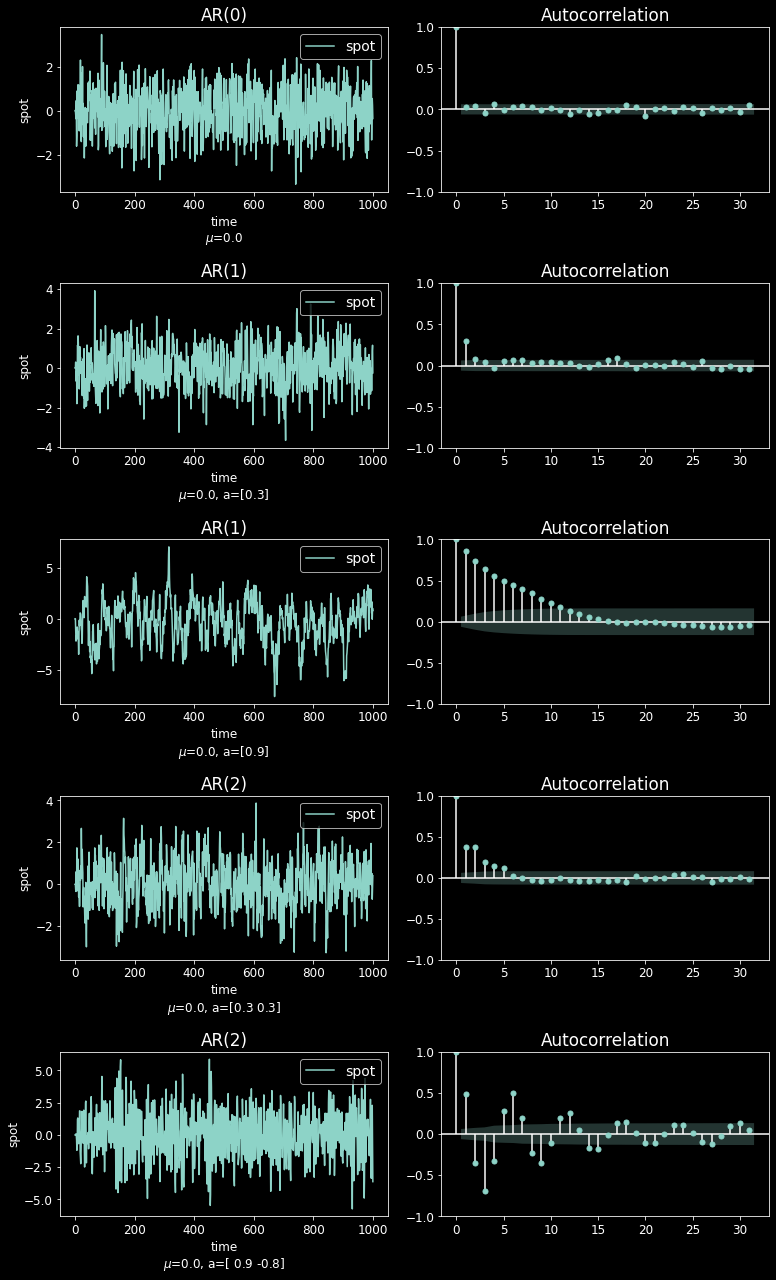

In [5]:
fig, axess = plt.subplots(nrows=5, ncols=2)

a_ = [
    [],
    [0.3],
    [0.9],
    [0.3, 0.3],
    [0.9, -0.8],
]

X = AR(x0=[0.0, 0.0], mu=0.0, T=T, vol=1.0)

for i, axes in enumerate(axess):
    a = a_[i]
    X.a = a
    df = X.simulate()
    
    ax = axes[0]
    df.plot(kind='line', ax=ax)
    
    if X.p > 0:
        ax.set_xlabel('time\n$\mu$={:.1f}, a={}'.format(X.mu, X.a))
    else:
        ax.set_xlabel('time\n$\mu$={:.1f}'.format(X.mu))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    ax.set_title('AR({:.0f})'.format(X.p))
    
    ax = axes[1]
    plot_acf(df, ax=ax)
    
plt.tight_layout()
plt.show()

## Moving-average model MA(q)

$$X_t = \mu + Z_t + \sum_{j=1}^q b_{j} Z_{t-j}$$

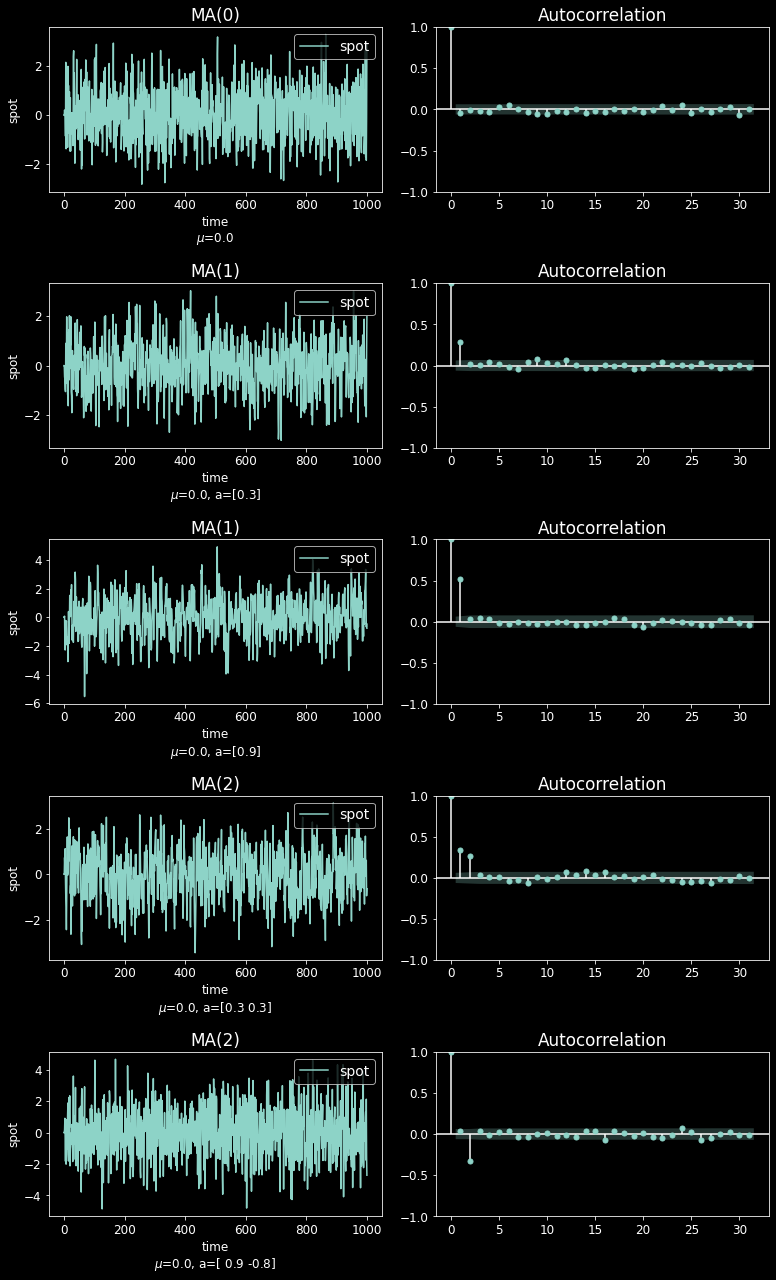

In [6]:
fig, axess = plt.subplots(nrows=5, ncols=2)

b_ = [
    [],
    [0.3],
    [0.9],
    [0.3, 0.3],
    [0.9, -0.8],
]

X = MA(x0=[0.0, 0.0], mu=0.0, T=T, vol=1.0)

for i, axes in enumerate(axess):
    b = b_[i]
    X.b = b
    df = X.simulate()
    
    ax = axes[0]
    df.plot(kind='line', ax=ax)
    
    if X.q > 0:
        ax.set_xlabel('time\n$\mu$={:.1f}, a={}'.format(X.mu, X.b))
    else:
        ax.set_xlabel('time\n$\mu$={:.1f}'.format(X.mu))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    ax.set_title('MA({:.0f})'.format(X.q))
    
    ax = axes[1]
    plot_acf(df, ax=ax)
    
plt.tight_layout()
plt.show()